<a href="https://colab.research.google.com/github/victorviro/Deep_learning_python/blob/master/YOLO_explained.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In previous notebooks we [introduced the CNNs](https://github.com/victorviro/Deep_learning_python/blob/master/Introduction_to_CNNs.ipynb) and we study different [architectures of CNNs](https://github.com/victorviro/Deep_learning_python/blob/master/CNN_Architectures.ipynb) for classification tasks. Later we saw an [introduction to object detection](https://github.com/victorviro/Deep_learning_python/blob/master/Introduction_to_object_detection.ipynb) and some techniques to [improve object detection](https://github.com/victorviro/Deep_learning_python/blob/master/Improving_object_detection.ipynb). Here we are going to go deep into a famous architecture to perform object detection: YOLO.


# You Only Look Once (YOLO)



YOLO is an extremely fast and accurate object detection architecture proposed by Joseph Redmon in a [paper](https://arxiv.org/abs/1506.02640) in 2015, and subsequently improved in 2016 ([YOLOv2](https://arxiv.org/abs/1612.08242)), in 2018 ([YOLOv3](https://arxiv.org/abs/1804.02767)), and recently in 2020 ([YOLOv4](https://arxiv.org/abs/2004.10934)). It is so fast that it can run in realtime on a video.

## YOLOv1

[YOLO](https://arxiv.org/abs/1506.02640) was first introduced in 2016 as a different approach to treat generic object detection problems. The approach is based on training only one CNN. YOLOv1 is composed of 24 convolutional layers for feature extraction and 2 fully connected layers for generating the final output. The total architecture is detailed in Figure 1.

![texto alternativo](https://i.ibb.co/3zxgn4Y/YOLOv1-arquitecture.png)

The input image is divided into a grid of $S \times S$. Every grid cell can be associated with only one object. The grid cell has also a fixed number B of boundary boxes to be predicted for this object (called anchor boxes or bounding box priors)(for a visual explanation of anchor boxes check this [video](https://www.youtube.com/watch?v=RTlwl2bv0Tg&list=PLkDaE6sCZn6Gl29AoE31iwdVwSG-KnDzF&index=29)). The anchor box dimensions are hand picked. YOLO calculates for every grid cell a vector of class probabilities among the C classes we are targeting. YOLO calculates also for every bounding box of the cell a vector containing 5 parameters: $(x, y, w, h$, box_confidence_score).The box_confidence_score reflects how likely the box contains an object (objectness) and represents the IOU between the predicted box and any ground truth box. The $(x, y)$ coordinates represent the center of the box relative to the bounds of the grid cell (offsets). Once the image is divided into a $S \times S$ grid, for each object, the grid cell $(g_x,g_y)$ containing the object’s center is located. Having assigned the "responsibility" of predicting the object to a grid cell, the center of the bounding box is described as offsets from the cell as shown in the next figure.

![texto alternativo](https://i.ibb.co/bmk0kmc/object-center-as-offsets.png)



The width and height are predicted relative to the whole image (normalized). Therefore, $x, y, w$ and $h$ are all between 0 and 1. Hence, the YOLO network generates for every input image a tensor of the form: $S \times S \times (B \ast 5 + C)$ where:

- $S \times S$: corresponds to the number of grid cells.
- B: corresponds to the number of bounding boxes (anchor boxes).
- C: corresponds to the number of targeted classes.

For evaluating YOLO on dataset PASCAL VOC, authors used S = 7, B = 2. PASCAL VOC has 20 labelled classes so C = 20. The final prediction is a 7 × 7 × 30 tensor.

Having assigned the object to a grid cell, the truth vector $y_{(g_x,g_y)}$ requires the predictions $\hat{y}_{(g_x,g_y)}$ are located at the grid cell in the tensor outputted from the Yolo CNN. As seen in the next figure, each grid cell predicts two bounding boxes with their respective object existence probabilities $P(\text{Object})$ and a class probability distribution, so each cell only predicts one object and, at prediction time, we select the bounding box with the highest value of $P(\text{Object})$, which is the probability the box contains an object.

![texto alternativo](https://i.ibb.co/s25ds3x/output-vector-yolo.png)

In the figure, the true object bounding box is denoted as $\boldsymbol{b}$, the predicted bounding boxes as $\boldsymbol{\hat{b}}_1$ and $\boldsymbol{\hat{b}}_2$, the true class probability vector as $\boldsymbol{p}$, the predicted class probability vector as $\boldsymbol{\hat{p}}$. The "confidence" that box1 and box2, respectively, contain an object (P(Object) for the respective boxes) are denoted by $\hat{c}_1$ and $\hat{c}_2$.

The true object bounding box $\boldsymbol{b}$ is assigned to one of box1 or box2 based on which predicted bounding box has the highest Intersection over Union with $\boldsymbol{b}$. The value c is set to be the maximum IoU. This process results in the truth vector $y_{(g_x,g_y)}$, an example of which is depicted in the previous figure.




To train the YOLO network, they used a combination of three loss functions. The first is the classification loss (loss of the conditional probabilities for every class). The second is the localization loss (the position of the estimated bounding box compared to the ground truth). The third is the confidence loss (the box confidence score compared to the ground truth).
The expression of the loss is detailed in the paper. To measure the error between the predicted value and the ground truth, YOLO uses sum-squared error as a metric. 

Just like in training, predicting detections for a test image only requires one network evaluation. Often it is clear which grid cell an object falls in to and the network only predicts one box for each object. However, some large objects or objects near the border of multiple cells can be well localized by multiple cells. Non-maximal suppression can be used to fix these multiple detections.

When it was introduced, YOLO surpassed other object detection algorithms in terms of speed. Its mAP (mean Average Precision) was comparable or exceeded the mAP of other state-of-the-art algorithms. However the model had some limitations. For example, each grid cell only predicts two boxes and can only have one class. This constraint limits the number of nearby objects that the model can predict. Hence, the model struggles with small objects that appear in groups, such as flocks of birds. Other limitation is that the loss function treats errors the same in small bounding boxes versus large bounding boxes.

![texto alternativo](https://i.ibb.co/N7XyzWq/yolov1-ex.png)

## YOLOv2


In [YOLOv2](https://arxiv.org/abs/1612.08242), many improvements had been introduced to increase the accuracy and decrease the processing time. Among them, we can note:

- [**Batch Normalization**](https://github.com/victorviro/Deep_learning_python/blob/master/Vanishing_Exploding_gradients_problem_DNNs.ipynb) (BN): BN was added to all convolutional layers, which improved the mAP by 2%. Dropout was removed from the model without overfitting.





- **Convolution with anchor boxes**:

 - YOLOv1 predicts the coordinates of bounding boxes directly using fully connected layers on top of the convolutional feature extractor. In YOLOv2 the fully connected layers are removed and anchor boxes are used to predict bounding boxes. In Yolo v1, each grid cell in the last layer can predict just one object because, while each grid cell gives us a choice between two bounding boxes, we only have one class probability vector. In Yolo v2, the class prediction is moved from the level of the grid cell to the level of the boundary box (the model predicts class for every anchor box for each grid cell). Thus, the YOLOv2 network generates for every input image a tensor of the form: $S \times S \times (B \ast (5 + C)$). Each prediction includes 4 parameters for the boundary box, 1 box confidence score (objectness) and C class probabilities. If we use C = 20 and B = 5, we will have $25\ast25=125$ parameters per grid cell. Same as YOLOv1, the objectness prediction still predicts the IOU of the ground truth and the proposed box, and the class predictions predict the conditional probability of that class given that there is an object. YOLOv2 uses 5 anchor boxes, but that makes creating diagrams and notation painful, so it is limited to 2 in the next figure and a $7 \times 7$ grid is used for the same reason.

    ![texto alternativo](https://i.ibb.co/Ws9VtH2/yolov2-prediction.png)



 - The input image size is changed from $448 \times 448$ to $416 \times 416$. This creates an odd number spatial dimension ($7 \times 7$ v.s. $8 \times 8$ grid cell). The center of a picture is often occupied by a large object. With an odd number grid cell, it is more certain on where the object belongs.


 - One pooling layer is removed to make the output of the network’s convolutional layers higher resolution (to $13 \times 13$ instead of $7 \times 7$).

 - **High-resolution classifier**: The YOLOv1 training composes of 2 phases. It trains the classifier network at $224 \times 224$ and increases the resolution to 448 for detection. YOLOv2 starts with $224 \times 224$ pictures for the classifier training but then retune the classifier again with $448 \times 448$ pictures using 10 epochs. This makes the detector training easier and moves mAP up by 4%. To fine tune the resulting network for detection, they replaced the last convolution layer with three $3 \times 3$ convolutional layers each outputting 1024 output channels. Then a final $1 \times 1$ convolutional layer is added to convert the $7 \times 7 \times 1024$ output into $7 \times 7 \times 125$.

- **Dimension Clusters**:The use of K-means clustering algorithm to select the best anchor box from the training set of truth bounding boxes. Since we are dealing with boundary boxes rather than points, we cannot use the regular spatial distance to measure datapoint distances like Euclidian distance. No surprise, they used IoU.

- **Direct location prediction**: YOLOv1 predicts the width and height of a bounding box directly. Yolo v2 predicts width and height offsets relative to an anchor box. The center coordinates for each bounding box prediction remain the same as in YOLOv1. YOLOv1 does not have constraints on location prediction which makes the model unstable at early iterations. The predicted bounding box can be far from the original grid location. Thus, YOLOv2 predicts $(t_x, t_y, t_w, t_h, t_o)$ and applies the sigma function to constraint its possible offset range. This makes the network converge better.


  ![texto alternativo](https://i.ibb.co/bBm7TDj/constrained-BBox-prediction.png)

- 
 - $(c_x, c_y)$ is the location of the grid.

 - $(b_x, b_y)$ is the location of bounding box.

 - $(p_w, p_h)$ is the anchor box prior got from clustering.

 - $(b_w, b_h)$ is the bounding box dimensions: $(p_w, p_h)$ scaled by $(t_w, t_h)$.

- **Fine-grained features**: Similarly to the identity mapping in ResNet, YOLOv2 concatenates low resolution features to high resolution features to improve the ability to detect small objects. It reshapes the $26 \times 26 \times 512$ layer to $13 \times 13 \times 2048$. Then it concatenates with the original $13 \times 13 \times 1024$ output layer. Now they apply convolution filters on the new $13 \times 13 \times 3072$ layer to make predictions. This improves the mAP by 1%.

- **Multi-Scale Training**: The original YOLO uses an input resolution of $448 \times 448$. With the addition of anchor boxes they changed the resolution to $416 \times 416$. However, since the model only uses convolutional and pooling layers it can be resized on the fly. Instead of fixing the input image size they change the network every few iterations. Every 10 batches the network randomly chooses a new image dimension size. Since the model downsamples by a factor of 32, we pull from the following multiples of 32: {320, 352, ..., 608}. They resize the network to that dimension and continue training. This acts as data augmentation and forces the network to predict well for different input image dimension and scale. 


- The **loss function** used in YOLOv2 is not explicitly described in the paper, but we can infer from the YOLOv1 loss function. While there are now multiple object predictions per grid cell, YOLOv2 still performs a max-IOU matching of truth to predicted bounding box. It is expected that the bounding box coordinate loss is still a weight linear regression loss. However, the Yolo v3 tech report mentions using binary cross entropy loss for the class predictions and Yolo v2 mentions classification loss, which we infer to mean not regression loss, so Yolo v2 probably uses binary cross entropy.

Some improvements had been introduced to speed performance. Most detection frameworks rely on VGG-16 as the base feature extractor. VGG-16 is a powerful, accurate classification network (see notebook [CNNs architectures](https://github.com/victorviro/Deep_learning_python/blob/master/CNN_Architectures.ipynb)) but it is needlessly complex. VGG16 requires 30.69 billion floating point operations for a single pass over a $224 \times 224$ image versus 8.52 billion operations for a customized GoogLeNet. We can replace the VGG16 with the customized GoogLeNet. YOLOv1 leverages GoogeLeNet architecture but pays a price on the top-5 accuracy for ImageNet: accuracy drops from 90.0% to 88.0%.

- **DarkNet**: Similar to the VGG models, DarkNet uses mostly $3 \times 3$ filters and double the number of channels after every pooling step. Following the work on Network in Network (NIN) it uses global average pooling to make predictions as well as $1 \times 1$ to reduce output channels. It uses batch normalization to stabilize training, speed up convergence, and regularize the model. The final model, called *Darknet-19*, has 19 convolutional layers and 5 maxpooling layers.  Darknet-19 only requires 5.58 billion operations to process an image yet achieves 72.9% top-1 accuracy and 91.2% top-5 accuracy on ImageNet.

 ![texto alternativo](https://i.ibb.co/6Rp1zmJ/darknet-19-arquitecture-png.png)




**YOLO9000**: In the paper, authors also trained a model using this object detector on more than 9000 classes from ImageNet as well as detection data from COCO. This model uses hierarchical classification: the model predicts a probability for each node in a visual hierarchy called Word‐Tree. This makes it possible for the network to predict with high confidence that an image represents, say, a dog, even though it is unsure what specific type of dog it is.

## YOLOv3

In April 2018, the [YOLOv3](https://arxiv.org/abs/1804.02767) was introduced as an incremental improvement to the previous versions. Among the improvements made, we can note:

- **Class prediction**: The use of the multi-label classification. Instead of the mutual exclusive labeling in the previous versions, YOLOv3 uses a logistic classifier to estimate the likeliness of the object being of a specific label (using a softmax imposes the assumption that each box has exactly one class which is often not the case, for example, if we have classes like person and women). During training, the binary cross-entropy loss is used for the class predictions.

- **Bounding box prediction & cost function calculation**: Following YOLOv2 this network predicts bounding boxes using dimension clusters as anchor boxes. The network predicts 4 coordinates for each bounding box, $t_x, t_y, t_w, t_h$ using the sum of squared error loss during training. The objectness score is also predited for each bounding box using logistic regression. YOLOv3 changes the way in calculating the cost function. During the training, the objectness score 1 is associated with the bounding box prior (anchor) that best overlaps the ground truth object. If the bounding box prior is not the best but does overlap a ground truth object by more than some threshold (default 0.5) the prediction is ignored. Each ground truth object is associated with only one boundary box prior. If a bounding box prior is not assigned to a ground truth object, it incurs no classification and localization lost, just confidence loss on objectness.

- **Feature extractor**: As we saw, YOLOv2 used a custom deep architecture darknet-19, an originally 19-layer network supplemented with 11 more layers for object detection. With a 30-layer architecture, YOLOv2 often struggled with small object detections. This was attributed to loss of fine-grained features as the layers downsampled the input. To remedy this, YOLOv2 used an identity mapping, concatenating feature maps from a previous layer to capture low level features. However, YOLO v2’s architecture was still lacking some of the most important elements that are now staple in most of state-of-the art algorithms. No residual blocks, no skip connections and no upsampling. YOLOv3 incorporates all of these. First, YOLOv3 uses a variant of Darknet as the feature extractor, which originally has 53 layer network trained on Imagenet. For the task of detection, 53 more layers are stacked onto it, giving us a 106 layer fully convolutional underlying architecture for YOLOv3. This is the reason behind the slowness of YOLO v3 compared to YOLOv2.  The new feature extractor, called Darknet-53, has 53 layers and uses skip connection similarly to ResNet. It uses both $3 \times 3$ and $1 \times 1$ convolutions. It gave the state of the art accuracy but with better speed and fewer computations. Here is how the architecture of YOLOv3 looks like.

![texto alternativo](https://www.researchgate.net/profile/Wen_Liu121/publication/335228064/figure/fig2/AS:793166898819072@1566117133057/The-framework-of-YOLOv3-neural-network-for-ship-detection.jpg)



- **Predictions across scales**: In YOLOv3, the prediction is done for one grid cell at 3 different scales (the detection is done by applying $1 \times 1$ detection kernels on feature maps of three different sizes at three different places in the network). This was inspired by the Feature Pyramid Networks (FPN) (see notebook [improving object detection](https://github.com/victorviro/Deep_learning_python/blob/master/Improving_object_detection.ipynb)). From the base feature extractor we add several convolutional layers. 
The last of these layers predicts a 3-d tensor encoding bounding box, objectness, and class predictions. We predict $B=3$ boxes (anchor boxes) at each scale for each grid cell so the tensor is then: $S \times S \times (B \ast (5 + C))$ where:

 - $S \times S$: corresponds to the number of grid cells.
 - $B$: corresponds to the number of anchor boxes at each scale ($B=3$)
 - $C$: corresponds to the number of targeted classes ($C=80$ for COCO).

 ![texto alternativo](https://i.ibb.co/v4Hf9SB/yolov3-prediction.png)

 Yolo v3 merges earlier layers in the feature extractor network with later layers (the extra CNN layers), which is essentially what FPNs do. Intuitively, small objects are more easily detected in high resolution early layers than in the significantly, subsampled low resolution later layers, but the early layers of a CNN contain semantically weak features, so rather than use them directly, FPNs merge them with upsampled later layers that contain semantically strong features.

 ![texto alternativo](https://i.ibb.co/T0HQLs8/fpn-yolov3.png)


 We can see from the previous figure that Yolov3, unlike FPNs, uses concatenation instead of summation to merge layers and, while not mentioned, Yolov3 probably upsamples the same way as FPN (using nearest neighbor). In addition the Yolov3 structure isn’t quite the same as the FPN, since Yolov3 doesn’t use the result of previous merges to produce the next detection tensor. To be more clear on the differences, we produced a diagram of the interpretation of what Yolov3 would have looked like if it followed FPN structure more closely.

 ![texto alternativo](https://i.ibb.co/LNz2tPM/fpn2-yolov3.png)




## YOLOv4

Modern object detectors are usually composed of two parts, a backbone which is usually pre-trained on ImageNet (or in a similar dataset) and a head which is used to predict classes and bounding boxes of objects. The backbone refers to the network which takes as input the image and extracts the features maps. It could be VGG, ResNet, ResNeXt, etc. The head part is usually categorized into two kinds, i.e., one-stage object detector and two-stage object detector. One-stage object detectors takes only one forward propagation pass through the network to make the predictions and they are usually faster than two-stage detectors but they usually have less accuracy. The most representative one-stage object detectors are *You Only Look Once* ([YOLOv1](https://arxiv.org/abs/1506.02640), [YOLOv2](https://arxiv.org/abs/1612.08242), [YOLOv3](https://arxiv.org/abs/1804.02767), [YOLOv4](https://arxiv.org/abs/2004.10934)), *Single Shot MultiBox Detector* ([SSD](https://arxiv.org/abs/1512.02325)) ,and [RetinaNet](https://arxiv.org/abs/1708.02002). As for two-stage object detector, the most representative models are the [R-CNN](https://arxiv.org/abs/1311.2524) series (including [fast R-CNN](https://arxiv.org/abs/1504.08083), [faster R-CNN](https://arxiv.org/abs/1506.01497) and [R-FCN](https://arxiv.org/abs/1605.06409)). Object detectors developed in recent years often insert some layers between backbone and head, and these layers are usually used to collect feature maps from different stages. We can call it the *neck* of an object detector. Usually, a neck is composed of several bottom-up paths and several top-down paths. Networks equipped with this mechanism include *Feature Pyramid Network* ([FPN](https://arxiv.org/abs/1612.03144)) or *Path Aggregation Network* ([PAN](https://arxiv.org/abs/1803.01534)).


To sum up, object detectors tipically are compose of several components:



![texto alternativo](https://i.ibb.co/LN2vn7q/object-detection-flow.png)






[YOLOv4](https://arxiv.org/abs/2004.10934) was introduced in 2020. Several architectural design candidates were shortlisted for the YOLOv4 model generation.

![texto alternativo](https://i.ibb.co/Vw3sLBQ/object-detector-arquitecture.png)

The baseline architecture used in YOLOv4 is shown in the next figure:

![texto alternativo](https://i.ibb.co/n1sFfvX/baseline-architecture-YOLOv4.png)

Apart from different approaches in architecture designs, the authors also added two new “Bags” or optimization procedures to be used at the time of training and inference. Improvements made in the training process to advance accuracy without impact on inference speed (like data augmentation, class imbalance, cost function, soft labeling, etc)  are called *Bag of Freebies* (BoG). Another methods, called *Bag of Specials* (BoS), impacts the inference time slightly with a good return in performance. These improvements include the increase of the receptive field, the use of attention, feature integration like skip-connections & FPN, and post-processing like non-maximum suppression. BoF and BoS was filled with different approaches used for both, backbone and detector modules. The most of these techniches are explained in the notebook [Improving object detection](https://github.com/victorviro/Deep_learning_python/blob/master/Improving_object_detection.ipynb). The next figure show which of this methods was choosen in the design of YOLOv4:

![texto alternativo](https://i.ibb.co/XXW0R52/bag-freebies-and-specials-YOLOv4.png)

### Backbone

We have seen the DenseNet architecture ([notebook CNN architectures](https://github.com/victorviro/Deep_learning_python/blob/master/CNN_Architectures.ipynb)) which allows us to build much deeper networks



#### Cross-Stage-Partial-connections (CSP)

[CSPNet](https://arxiv.org/abs/1911.11929) separates the input feature maps of the DenseBlock into two parts. The first part bypasses the DenseBlock (is used directly into the concatenation with the final output of the  Transition Block (TB)) and becomes part of the input to the next transition layer. The second part will go thought the Dense block (is used as an input in the Dense Block (DB)) as below.

![texto alternativo](https://i.ibb.co/fYhvgJC/Densenet-CSPDensenet.png)

This new design reduces the computational complexity by separating the input into two parts, with only one going through the Dense Block (decrease the number of multiplications in Dense Block).

![texto alternativo](https://i.ibb.co/VjH5KqM/CSPDense-Net.png)

#### CSPDarknet53

YOLOv4 uses the CSP connections above with the Darknet-53 of YOLOv3 below as the backbone in feature extraction. The CSPDarknet53 model has higher accuracy in object detection compared with ResNet based designs even they have a better classification performance. But the classification accuracy of CSPDarknet53 can be improved with Mish and other techniques discussed later.


#### Mish activation function

ReLU (Rectified Linear Unit) is one of the most famous activation functions. It’s easy differentiability and zero cost are the biggest advantages that make them the first choice. As we discussed [here](https://github.com/victorviro/Deep_learning_python/blob/master/Vanishing_Exploding_gradients_problem_DNNs.ipynb) RELU suffers from a problem known as the *dying ReLUs*.

Mish is a novel activation function similar to Swish and is defined as

$$f(x)=x\text{tanh}(\text{softplus(x)})=x\text{tanh}(\text{ln}(1+e^x))$$



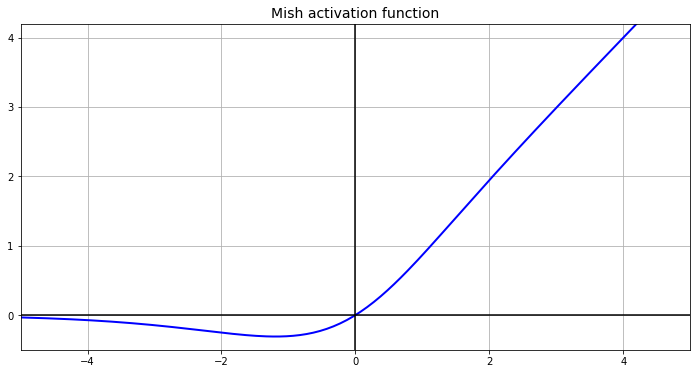

In [ ]:
#@title
import matplotlib.pyplot as plt
import numpy as np

def mish(z, alpha=0.01):
    return z*np.tanh(np.log(1+np.exp(z)))

z = np.linspace(-5, 5, 200)
plt.figure(figsize=(12, 6))
plt.plot(z, mish(z, 0.05), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([0, 0], [-0.5, 4.2], 'k-')
plt.grid(True)
props = dict(facecolor='black', shrink=0.1)
plt.title("Mish activation function", fontsize=14)
plt.axis([-5, 5, -0.5, 4.2])
plt.show()

The properties of Mish activation function are:

- *Non-monotonic function*: Preserves negative values, that stabilize the network gradient flow and unlike ReLU, and almost solving Dying ReLU problem and helps to learn more expressive features.

- *Unboundedness and Bounded Below*: Former helps to remove the saturation problem of the output neurons and the latter helps in better regularization of networks.

- *Infinite Order of Continuity*: Unbiased towards initialization of weights and learning rate due to the smoothness of a function helping for the better generalizations.

- High compute function but increases accuracy: Although being high-cost function, it has proven itself better in deep layers in comparison to ReLU.

- *Scalar Gating*: Scalar Gating is an important property of this function and so it becomes logical and can easily replace the pointwise functions like ReLU.


Using Mish as an activation function in YOLOv4 showed decent amount of accuracy gains. Mish Activation + CSPDarknet53 combo gave the best results in the study mentioned in the paper.


#### Bag of freebies

The bag of freebies used in the backbone are class label smothing, Mosaic and Cutmix data augmentation techniques, and Dropblock regularization. These methods are explained in the notebook [Improving object detection](https://github.com/victorviro/Deep_learning_python/blob/master/Improving_object_detection.ipynb).

### Neck

#### SPP

Several modules can be used to enhance receptive field like Spatial Pyramid Pooling ([SPP](https://arxiv.org/abs/1406.4729)), Atrous Spatial Pyramid Pooling ([ASPP](https://arxiv.org/abs/1606.00915)), and Receptive Field Block Net ([RFB](https://arxiv.org/abs/1711.07767)). This modules are explained in the notebook [Improving object detection](https://github.com/victorviro/Deep_learning_python/blob/master/Improving_object_detection.ipynb).

YOLOv4 uses SPP. However, conventional SPP generates 1-D output, which cannot be used in FCNs like YOLO. Therefore, before passing the output feature map to YOLO-Head, it is passed to different convolutional blocks of kernel size $1\times1$, $3\times3$, $9\times9$, and $13\times13$ to increase the receptive field and capture different object patterns at different scales. These are concatenated and then passed to the final prediction stage or YOLO Head.

![texto alternativo](https://i.ibb.co/85pW2C4/yolov4-SPP.png)

In YOLOv4, SPP is used as an extra module to increase the receptive field. Backbone is comprised CSPDarknet53. So this module is used after the ((DB+TB)+TB) blocks i.e after partial connections as discussed in previously.

#### PANet

Collecting feature maps from different stages can help to recognize objects at different scales. *Feature Pyramid Network* ([FPN](https://arxiv.org/abs/1612.03144)) or *Path Aggregation Network* ([PAN](https://arxiv.org/abs/1803.01534)) are modules specifically designed to this purpose. This modules are explained in the notebook [Improving object detection](https://github.com/victorviro/Deep_learning_python/blob/master/Improving_object_detection.ipynb)..

In YOLOv4, a modified version of PAN is used for feature aggregation. Instead of elementwise addition, concatenation approach is used between every bottom-up layer. This helps in conserving the missed out or FPN+Bottom Up features at the same time. Of course, this will increase the computational power.

![texto alternativo](https://i.ibb.co/THZF8ZF/PAN-vs-PAN-YOLOv4.png)

### Head

The head of YOLOv4 is the same as in YOLOv3.

- The bag of freebies used in the detector are CIoU loss, cross Minibatch normalization (CmBN), DropBlock regularization, mosaic data augmentation and self adversarial training.

- The bag os specials used in the the detector are the mish activation function, Spatial Pyramid Pooling, Spatial Attention Module, Path Aggregation Networks and DIoU-NMS.

## PP-YOLO

In August 2020 researches of company Baidu have published a paper which intruce a new design of this popular architecture called [PP-YOLO](https://arxiv.org/abs/2007.12099). PP is short for PaddlePaddle, a deep learning framework written by Baidu.



I encourage you to go ahead and read the paper and previous ones: they are quite pleasant to read, and it is an excellent example of how Deep Learning systems can be incrementally improved.


# References

- [YOLO Paper](https://arxiv.org/abs/1506.02640), [YOLOv2 Paper](https://arxiv.org/abs/1612.08242), [YOLOv3 Paper](https://arxiv.org/abs/1804.02767), [YOLOv4 Paper](https://arxiv.org/abs/2004.10934), [PP-YOLO Paper](https://arxiv.org/abs/2007.12099)

- [Course CNN deeplearning.ai.](https://www.youtube.com/watch?v=9s_FpMpdYW8&list=PLkDaE6sCZn6Gl29AoE31iwdVwSG-KnDzF&index=30)

- [Yolo Object Detectors](https://medium.com/oracledevs/final-layers-and-loss-functions-of-single-stage-detectors-part-1-4abbfa9aa71c)

- [Real-time Object Detection](https://medium.com/@jonathan_hui/real-time-object-detection-with-yolo-yolov2-28b1b93e2088)

- [What’s new in YOLO v3?](https://towardsdatascience.com/yolo-v3-object-detection-53fb7d3bfe6b)

- [BoF and BoS in YOLOv4](https://medium.com/@jonathan_hui/yolov4-c9901eaa8e61?source=---------4------------------)


- [YOLOv4 introduction](https://medium.com/visionwizard/yolov4-version-0-introduction-90514b413ccf)












